# Task 2.1

1.read the textfile

In [101]:
import nltk

# Download required NLTK resources
nltk.download('punkt')

# Load text from file
with open('a4/A4_question2a_data.txt', 'r') as f:
    text = f.read()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhengzhong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2.Calculate average word length

In [102]:
# Tokenize text into words
words = nltk.word_tokenize(text)

# Calculate average word length
total_length = sum(len(word) for word in words)
average_length = total_length / len(words)

# Print result
print(f'Average word length: {average_length:.2f} characters')

Average word length: 3.61 characters


3.Calculate average sentence length

In [103]:
import nltk
import re

# Download Punkt tokenizer
nltk.download('punkt')

# Define sentence tokenizer with custom rules,this step is to reserve sentences like "1. When shall we three meet againe?"
tokenizer = nltk.tokenize.punkt.PunktSentenceTokenizer()
tokenizer._params.abbrev_types.update({'1', '2', '3', '4', '5', '6', '7', '8', '9'})

# Load text from file
with open('a4/A4_question2a_data.txt', 'r') as f:
    text = f.read()

# Split text into sentences
sentences = tokenizer.tokenize(text)

# Remove line breaks and leading/trailing white space
sentences = [re.sub('\n', ' ', sent).strip() for sent in sentences]

# Calculate average sentence length
total_words = sum(len(nltk.word_tokenize(sent)) for sent in sentences)
average_length = total_words / len(sentences)

# Print result
print(f'Average sentence length: {average_length:.2f} words')


Average sentence length: 15.67 words


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhengzhong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4.Calculate number of times "king" appears

In [105]:
# Count occurrences of the word "king"
count = sum(1 for word in words if word.lower() == 'king')

# Print result
print(f'Number of times "king" appears: {count}')

Number of times "king" appears: 53


## Why I use TLNK for Task 2.1

NLTK (Natural Language Toolkit) is a Python library used for natural language processing (NLP) tasks such as text preprocessing, tokenization, stemming, lemmatization, parsing, tagging, and sentiment analysis.

After observing the textfile, I found that simple solution ".split()" can not perform well because there are lot of sentences like "1. When shall we three meet againe?". If we just simply use ".split((?<=[.!?]) +')", it is possible to get the sentence like this: "1.". So, to get more accurate sentences, I decided to use NLTK and define some custom rules.

# Task 2.2

1.Unzip the collection.zip file and load the text data into a Python list or pandas DataFrame.

In [24]:
import os

# Unzip the collection.zip file
os.system('unzip a4/A4_Question2b_data.zip')

# Load the text data into a list
data = []
for filename in os.listdir('A4_Question2b_data'):
    with open(os.path.join('A4_Question2b_data', filename), 'r') as f:
        data.append(f.read())


Archive:  a4/A4_Question2b_data.zip
   creating: A4_Question2b_data/
  inflating: A4_Question2b_data/D1.txt  
  inflating: __MACOSX/A4_Question2b_data/._D1.txt  
  inflating: A4_Question2b_data/D2.txt  
  inflating: __MACOSX/A4_Question2b_data/._D2.txt  


In [25]:
data

["[The Tragedie of Macbeth by William Shakespeare 1603]\n\n\nActus Primus. Scoena Prima.\n\nThunder and Lightning. Enter three Witches.\n\n  1. When shall we three meet againe?\nIn Thunder, Lightning, or in Raine?\n  2. When the Hurley-burley's done,\nWhen the Battaile's lost, and wonne\n\n   3. That will be ere the set of Sunne\n\n   1. Where the place?\n  2. Vpon the Heath\n\n   3. There to meet with Macbeth\n\n   1. I come, Gray-Malkin\n\n   All. Padock calls anon: faire is foule, and foule is faire,\nHouer through the fogge and filthie ayre.\n\nExeunt.\n\n\nScena Secunda.\n\nAlarum within. Enter King Malcome, Donalbaine, Lenox, with\nattendants,\nmeeting a bleeding Captaine.\n\n  King. What bloody man is that? he can report,\nAs seemeth by his plight, of the Reuolt\nThe newest state\n\n   Mal. This is the Serieant,\nWho like a good and hardie Souldier fought\n'Gainst my Captiuitie: Haile braue friend;\nSay to the King, the knowledge of the Broyle,\nAs thou didst leaue it\n\n   Cap.

2.Preprocess the text data to remove stop words and perform other text cleaning tasks using NLTK.

In [26]:
import nltk

# Download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Import the necessary modules
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Define a function to preprocess the text data
def preprocess(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words and perform stemming
    stop_words = set(stopwords.words('english'))
    porter = PorterStemmer()
    words = [porter.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Return the preprocessed text as a single string
    return ' '.join(words)

# Preprocess the text data
preprocessed_data = [preprocess(text) for text in data]


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhengzhong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhengzhong/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
preprocessed_data

['tragedi macbeth william shakespear actu primu scoena prima thunder lightn enter three witch shall three meet again thunder lightn rain done battail lost wonn ere set sunn place vpon heath meet macbeth come padock call anon fair foul foul fair houer fogg filthi ayr exeunt scena secunda alarum within enter king malcom donalbain lenox attend meet bleed captain king bloodi man report seemeth plight reuolt newest state mal serieant like good hardi souldier fought captiuiti hail braue friend say king knowledg broyl thou didst leaue cap doubtful stood two spent swimmer doe cling togeth choak art merciless macdonwald worthi rebel multipli villani natur doe swarm vpon western isl kern gallowgross suppli fortun damn quarri smile shew like rebel whore weak braue macbeth well hee deseru name disdayn fortun brandisht steel smoak bloodi execut like valour minion caru passag till hee fac slaue neu r shook hand bad farwel till vnseam naue toth chop fix head vpon battlement king valiant cousin worthi

3.Calculate the TF-IDF scores of all the words in the collection using TfidfVectorizer.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the preprocessed data and transform the data into a matrix of TF-IDF scores
tf_idf = vectorizer.fit_transform(preprocessed_data)


4.Convert the TF-IDF matrix to a DataFrame, and then create a dictionary that maps each term to its average TF-IDF score across all the documents.

In [30]:
import pandas as pd

# Convert the TF-IDF matrix to a DataFrame
df = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names())

# Calculate the average TF-IDF score for each term across all the documents
avg_tf_idf = df.mean(axis=0).to_dict()


In [31]:
avg_tf_idf

{'abhor': 0.002497256751604405,
 'abid': 0.0034436842903308464,
 'abiur': 0.001330170883032702,
 'abl': 0.0010898181736674131,
 'abou': 0.003990512649098106,
 'abound': 0.001330170883032702,
 'abroad': 0.002660341766065404,
 'absenc': 0.005769928109647791,
 'absent': 0.0032726713580433866,
 'absolut': 0.003990512649098106,
 'abund': 0.005449090868337066,
 'abus': 0.00482350057092135,
 'abysm': 0.0010898181736674131,
 'accent': 0.0017218421451654232,
 'accept': 0.0021796363473348263,
 'access': 0.001330170883032702,
 'accessari': 0.0010898181736674131,
 'accid': 0.0021796363473348263,
 'accompani': 0.001330170883032702,
 'accompt': 0.001330170883032702,
 'accord': 0.002660341766065404,
 'account': 0.00499451350320881,
 'accumul': 0.0010898181736674131,
 'accurs': 0.002660341766065404,
 'accus': 0.0032694545210022394,
 'accust': 0.001330170883032702,
 'accustom': 0.001330170883032702,
 'acheron': 0.001330170883032702,
 'achiev': 0.0010898181736674131,
 'acknowledg': 0.0010898181736674131

5.Save the "term, tf-idf score" pairs to a text file.

In [32]:
with open('tf_idf_scores.txt', 'w') as f:
    for term, score in avg_tf_idf.items():
        f.write(f'{term}, {score:.6f}\n')


6.Create a Word cloud of the top 100 TF-IDF terms using worldcloud.

In [34]:
pip install wordcloud


     |████████████████████████████████| 160 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


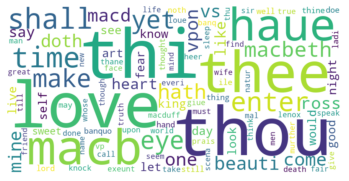

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a Word cloud of the top 100 TF-IDF terms
wc = WordCloud(width=800, height=400, background_color='white', max_words=100)
wordcloud=wc.generate_from_frequencies(avg_tf_idf)

# Draw the wordcloud figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Task 3 

## 3.1 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

1.Read the Dataset into a data frame csv file.

In [111]:
# load data 
df = pd.read_csv('a4/A4_question3_data.csv')

In [112]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


2.Explain any preprocessing steps and exploratory Data analysis that was performed before you start building your model.

In [113]:
# Get summary statistics for each column
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [114]:
# Check for missing values
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

<AxesSubplot:xlabel='Private', ylabel='count'>

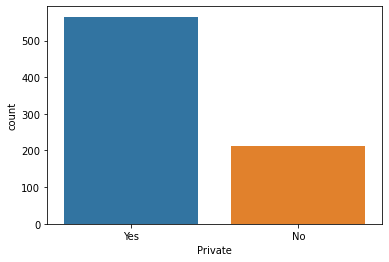

In [115]:
# Visualize the distribution of the private and public universities
import seaborn as sns
sns.countplot(x='Private', data=df)

In [116]:
# figure out which university has the highest alumni donation rate
df.loc[df['perc.alumni']==np.max(df['perc.alumni'])]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
763,Williams College,Yes,4186,1245,526,81,96,1988,29,19629,5790,500,1200,94,99,9.0,64,22014,99


We can find that Willams College has the highest alumni donation rate.This makes sense since this is a private, top-tier institution.

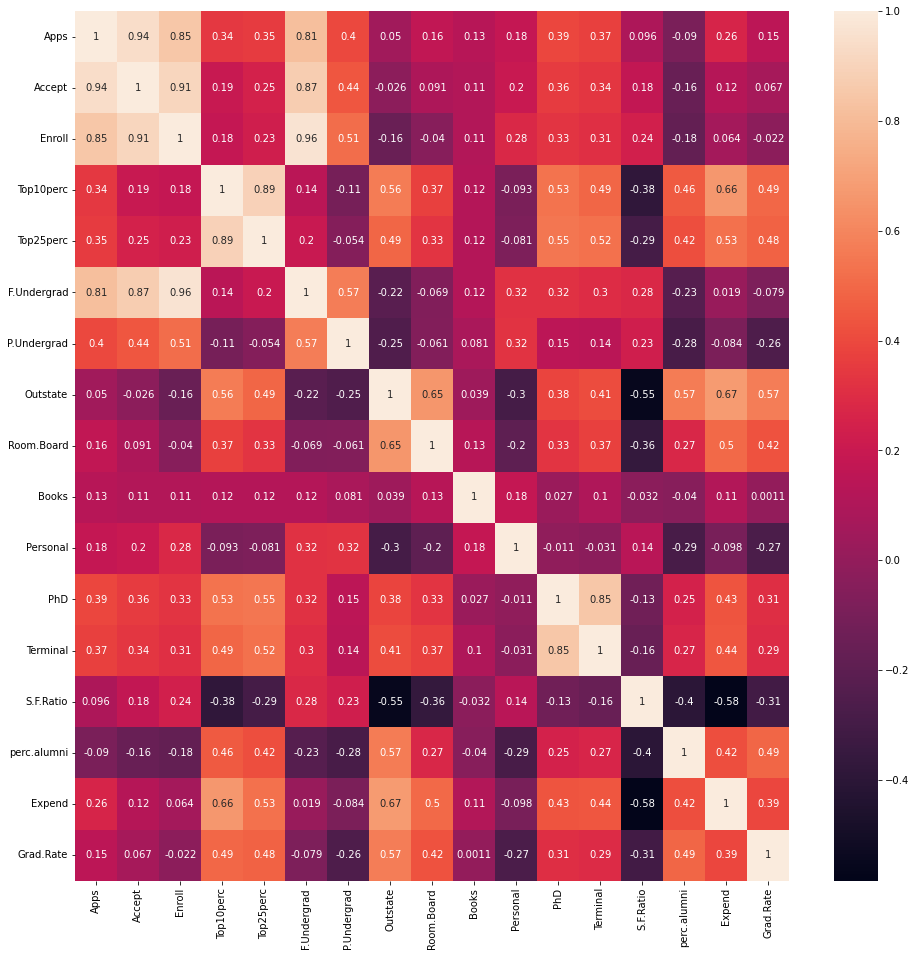

In [49]:
# use a heat map to observe the relationship between each feature
import seaborn as sns
corr = df[df.columns].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr,annot=True)
plt.show()

Above the figure, we can find that "Apps" has a strong relationship with "Accept", "Terminal" has a stroing relationship with "PhD".

In [121]:
# Encode 'Private' as binary variable
df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})

df = df.drop(['Unnamed: 0'], axis=1)
df


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [122]:
X = df.drop('Private', axis=1)
y = df['Private']

# use Z-score to normalize data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3.Build the model and get the class/cluster assignments.

logistic regression model

In [123]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)


In [124]:
# evaluate the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate precision, recall, F1-score, and support
print(classification_report(y_test,y_pred))

print("Mean Squared Error:", mse)


Accuracy: 0.9316239316239316
Confusion Matrix:
 [[ 55   9]
 [  7 163]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        64
           1       0.95      0.96      0.95       170

    accuracy                           0.93       234
   macro avg       0.92      0.91      0.91       234
weighted avg       0.93      0.93      0.93       234

Mean Squared Error: 0.06837606837606838


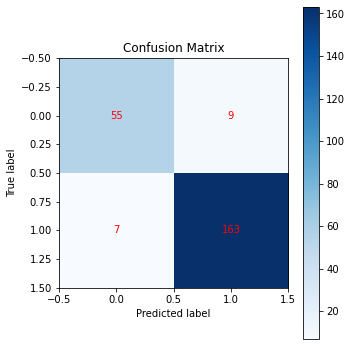

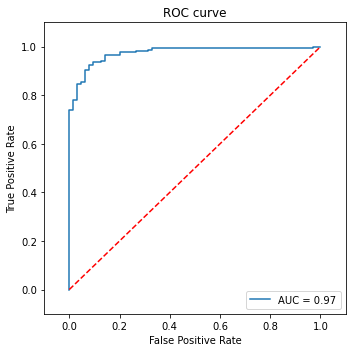

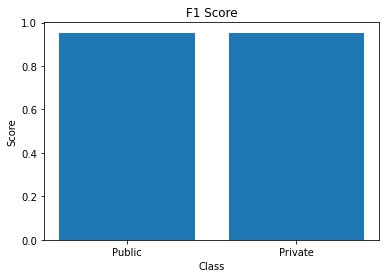

In [125]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Plot the ROC curve
y_pred_probs = logreg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = roc_auc_score(y_test, y_pred_probs[:,1])

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.tight_layout()
plt.show()

# Plot the F1- Score curve
# assume y_true and y_pred are the true and predicted labels for your model
f1 = f1_score(y_test, y_pred)
labels = ['Public', 'Private']

# plot the F1 score for each class
plt.bar(labels, f1)
plt.title('F1 Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.show()




KMeans Model

In [126]:
from sklearn.cluster import KMeans

X = df.drop(['Private'], axis=1)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_

df['Cluster'] = clusters


print('Confusion Matrix:\n', confusion_matrix(df['Private'], df['Cluster']))
print(classification_report(df['Private'],kmeans.labels_))


Confusion Matrix:
 [[ 66 146]
 [225 340]]
              precision    recall  f1-score   support

           0       0.23      0.31      0.26       212
           1       0.70      0.60      0.65       565

    accuracy                           0.52       777
   macro avg       0.46      0.46      0.45       777
weighted avg       0.57      0.52      0.54       777



## Which of the two models (Logistic regression or K-means) you think worked better and why? 

If we just look at the accuracy of the two models, the confusion matrix and the F1-Score, the logistic regression model performs much better than the K-means model, as its accuracy is 0.93, F1-score is 0.93 which are much higher than K-means' 0.22 and 0.16. However, we need to realize that KMeans is an unsupervised model, the model is aiming to make sense out of the mess of 18 features that we’ve given it, with no labels. This is not an easy task. So it is more accurate than the labeled model -- logistic regression model. Therefore, K Means is useful for making sense out of messy data

